In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

order = pd.read_csv('C:/Users/happy/Desktop/project/data/order.csv', index_col=0)

# datatype conversion 
order['call_time'] = order['call_time'].astype('datetime64')
order['board_time'] = order['board_time'].astype('datetime64')
order['alight_time'] = order['alight_time'].astype('datetime64')
order['suc_time'] = order['suc_time'].astype('datetime64')
order['cancel_time'] = order['cancel_time'].astype('datetime64')


C:\Users\happy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [37]:
order.head(1)

,ID,board_station,alight_station,adult,teen,child,distance,fare,suc_status,suc_status_d,call_time,board_time,alight_time,suc_time,cancel_time,x,y,board_adm,alight_adm
0,1,10258,10093,1,0,0,0.0,0,배차불가,NaN,2021-02-15 00:00:24,NaT,NaT,NaT,2021-02-15 00:00:25,37.508302,126.513957,운북동,운남동


In [4]:
order_cancel = order[(order['call_time'].notnull() & order['cancel_time'].notnull())]
order_cancel = order_cancel[order_cancel['suc_status'] != '배차불가']
order_cancel = order_cancel[order_cancel['suc_status'] != '시스템취소']

In [12]:
order_cancel['suc_status'].value_counts()

시뮬레이션취소    158264
탑승취소        39235
하차완료         3928
Name: suc_status, dtype: int64

In [40]:
order_cancel['suc_status_d'].value_counts(normalize=True)

승차시간 부족     0.370078
승차시간 지연     0.182133
다른교통수단이용    0.177749
개인사정        0.164853
미탑승         0.087957
중복신청취소      0.014885
관리자 취소      0.002345
Name: suc_status_d, dtype: float64

In [44]:
order_cancel['interval'] = order_cancel['cancel_time'] - order_cancel['call_time']
order_cancel['interval'] = order_cancel['interval'].astype("timedelta64[s]") / 60
order_cancel['interval'].describe()

count    201427.000000
mean          2.332223
std         196.542067
min           0.000000
25%           0.066667
50%           0.150000
75%           0.350000
max       87840.066667
Name: interval, dtype: float64

In [34]:
( order_cancel['interval'] <= 1 ).sum()

165707

In [17]:
( order_cancel['interval'] == 0 ).sum()

4876

In [16]:
IQR =  0.35 - 0.067
limit_1 = 0.067 - IQR * 1.5
limit_2 = 0.35 + IQR * 1.5
print(limit_1)
print(limit_2)

-0.3575
0.7745


<AxesSubplot:xlabel='interval', ylabel='Count'>

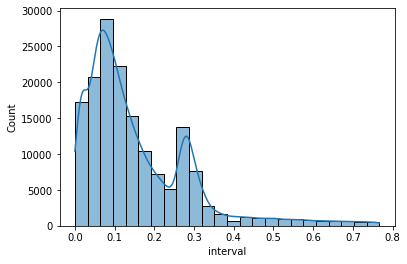

In [22]:
sns.histplot(data=order_cancel[order_cancel['interval']<0.7745], x="interval",bins = 24,kde = 'True')

<AxesSubplot:xlabel='interval', ylabel='Count'>

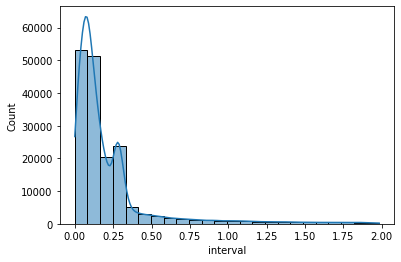

In [36]:
sns.histplot(data=order_cancel[(order_cancel['interval']<2) & (order_cancel['interval']>=0)], x="interval",bins = 24,kde = 'True')

## Trip 수요별로 묶어서 호출 ~ 취소까지 총 걸린 시간으로 생각해보기

In [56]:
order_cancel_trip = pd.DataFrame(order_cancel.groupby('Trip')['interval'].sum())

In [59]:
order_cancel_trip['interval'].describe()

count    104076.000000
mean          4.513747
std         273.773651
min           0.000000
25%           0.100000
50%           0.300000
75%           2.033333
max       87840.500000
Name: interval, dtype: float64

In [58]:
(order_cancel_trip['interval'] < 1).sum()

71744

In [60]:
71744/104076*100

68.93424036281179

In [49]:
IQR_2 =  2.03 - 0.1
lo = 0.1 - IQR * 1.5
up = 2.03 + IQR * 1.5
print(lo)
print(up)

-0.3245
2.4545


<AxesSubplot:xlabel='interval', ylabel='Count'>

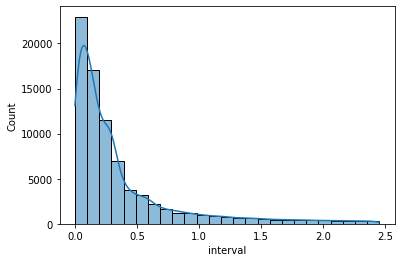

In [62]:
sns.histplot(data=order_cancel_trip[order_cancel_trip['interval']<2.4545], x="interval",bins = 25,kde = 'True')